<a href="https://colab.research.google.com/github/kausar-vento/PCVK_Genap_2023/blob/main/Minggu%207/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

# Sharpen (Tugas 1)

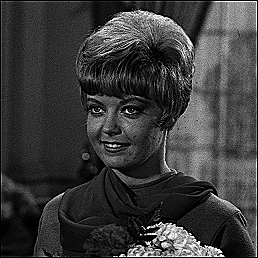

In [4]:
def convolution2d(image, kernel, stride, padding) :
  # Add padding to the image
  padded_image = np.pad(image, ((padding,padding), (padding,padding)), mode='constant')

  # Get the dimensions of the kernel and the padded image
  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = padded_image.shape

  # Calculate the dimensions of the output image
  output_height = int(((padded_height - kernel_height) / stride) + 1)
  output_width = int(((padded_width - kernel_width) / stride) + 1)

  # Create an empty output image
  output_image = np.zeros((output_height, output_width), dtype=np.float32)

  # Iterate over the image with the given stride
  for y in range(0, padded_height - kernel_height + 1, stride) :
    for x in range(0, padded_width - kernel_width + 1, stride) :
      # Extract the patch of the image that overlaps with the kernel
      patch = padded_image[y:y+kernel_height, x:x+kernel_width]

      # Compute the dot product between the patch and the kernel
      convolution = np.sum(patch * kernel)

      # Set the value of the output pixel at this location
      output_y = int(y / stride)
      output_x = int(x / stride)
      output_image[output_y, output_x] = convolution

  return output_image

img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

kernel_sharpen = np.array([
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]
])

result = convolution2d(img_gray, kernel_sharpen, 1, 2)
cv2_imshow(result)

# Embos (Tugas 2)

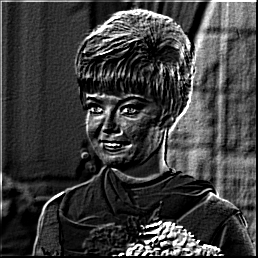

In [5]:
kernel_embos = np.array([
    [-2,-1,0],
    [-1,1,1],
    [0,1,2]
])

result2 = convolution2d(img_gray, kernel_embos, 1, 2)
cv2_imshow(result2)

# Left Sobel Detection (Tugas 3)

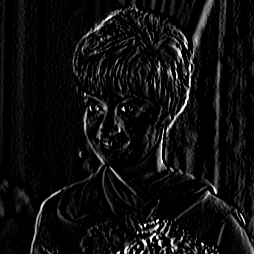

In [10]:
img_3 = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_3_gray = cv.cvtColor(img_3, cv.COLOR_BGR2GRAY).astype(np.float32)

def conv2(image, kernel, stride=1, padding=0):
    kernel = np.flip(kernel, axis=None)

    height, width = image.shape
    kernel_height, kernel_width = kernel.shape
    output_height = (height + 2 * padding - kernel_height) // stride + 1
    output_width = (width + 2 * padding - kernel_width) // stride + 1

    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    output_image = np.zeros((output_height, output_width), dtype=image.dtype)

    for y in range(0, height-kernel_height+1, stride):
        for x in range(0, width-kernel_width+1, stride):
            output_image[y//stride, x//stride] = np.sum(image[y:y+kernel_height, x:x+kernel_width] * kernel)

    return output_image

kernel_left_sobel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

result3 = conv2(img_3_gray, kernel_left_sobel, 1, 0)
cv2_imshow(result3)

# Canny Edge Detection (Tugas 4)

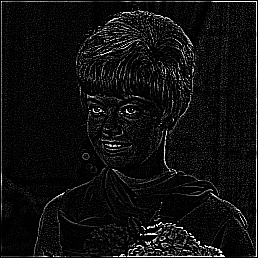

In [11]:
kernel_canny_edge = np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])

result4 = convolution2d(img_gray, kernel_canny_edge, 1, 2)
cv2_imshow(result4)

# Prewit Edge Detection (Tugas 5)

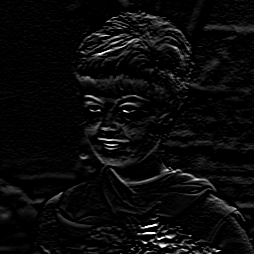

In [17]:
kernel_prewit_edge = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

result5 = conv2(img_3_gray, kernel_prewit_edge, 1, 0)
cv2_imshow(result5)

# 5x5 Gaussian Blur (Tugas 6)

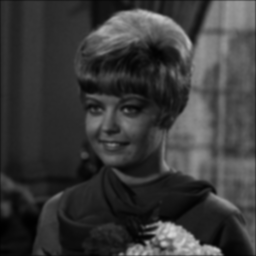

In [13]:
kernel_gaussian_blur = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])/ 256

result6 = convolution2d(img_gray, kernel_gaussian_blur, 1, 2)
cv2_imshow(result6)

# 21 x 21 Gaussian Blur (Tugas 7)

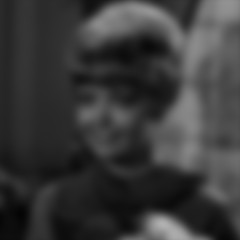

In [14]:
size = 21
sigma=math.sqrt(size)
gaussian_kernel = cv.getGaussianKernel(size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

result7 = convolution2d(img_gray, gauss_kernel, 1, 2)
cv2_imshow(result7)